In [2]:
# Enable interactive numpy and matplotlib
%pylab inline

# Data Wrangling 
import pandas as pd
import numpy as np

# Data Analysis
import powerlaw as pwl

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

# Network Analysis 
import networkx as nx
from networkx.algorithms import community
import networkx.algorithms.centrality as nc

# Network Epidemiology 
import EoN

# Data Visualization
import seaborn as sns
from netwulf import visualize

# Other Utilities 
import sys, os, os.path
import itertools
from progressbar import ProgressBar, Bar, Percentage
from operator import itemgetter
from collections import Counter
from collections import defaultdict
import random

# Custom Modules
import digital_epidemiology as depi

# Reload Custom Modules
from importlib import reload
depi = reload(depi)

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Import graphml file 
G=nx.Graph(nx.read_graphml("/Users/pietromonticone/github/DigitalEpidemiologyProject/Modelling/Python/GeoSpatial/ProvincialGraph.graphml"))

# Rename the graph 
G.name = "Graph of Italian Provinces"

# Show the basic attributes of the graph
print(nx.info(G))

Name: Graph of Italian Provinces
Type: Graph
Number of nodes: 107
Number of edges: 238
Average degree:   4.4486


## Stochastic SIR Epidemic on Static Network

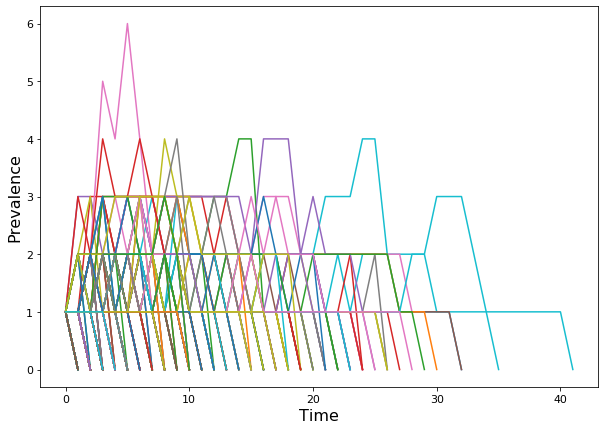

In [10]:
# Model Parameters
mu = 0.2           # Recovery rate 
lambd = 0.01       # Transmission rate per contact

# Simulation Parameters
nrun = 700       # Number of runs

# Multi-Run Simulation
runs = depi.network_SIR_multirun_simulation(G, nrun = nrun, lambd = lambd, mu = mu)

# Set figure size 
plt.figure(figsize=(10,7))

# Plot the ensemble of trajectories
depi.plot_ensemble(runs)

### $\lambda$-Sensitivity of Final Epidemic Size

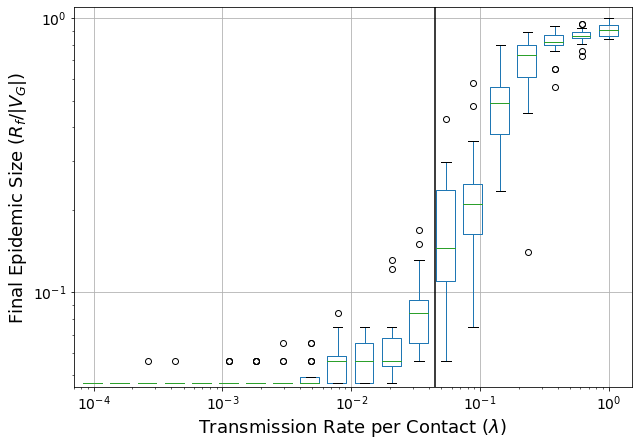

In [13]:
# Perform lambda-sensitivity analysis of final epidemic size (normalized attack rate) 
data = depi.network_SIR_finalsize_lambda_sensitivity(G, mu = mu, rho = 0.05, # rho = initial fraction infected
                                                    lambda_min = 0.0001, lambda_max = 1.0, 
                                                    nruns = 20)
# Show sensitivity dataset
data 

# Set figure size 
plt.figure(figsize=(10,7))

# Display a boxplot with final epidemic size vs. transmission rate per edge/contact
depi.boxplot_finalsize_lambda_sensitivity(G, mu = mu, data = data, 
                                         ymin = 0.045, ymax= 1.1,
                                         xlim = (0.00007, 1.5) )

In [14]:
nx.get_node_attributes(G, pos)

NameError: name 'pos' is not defined

In [24]:
import networkx as nx
import ndlib.models.epidemics as epi

In [25]:
# Network Definition
g = nx.erdos_renyi_graph(1000, 0.1)

# Model Selection
model = epi.SIRModel(g)

In [17]:
import ndlib.models.ModelConfig as mc

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)

In [18]:
# Simulation
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

100%|██████████| 200/200 [00:02<00:00, 70.91it/s] 


In [21]:
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence
from ndlib.viz.bokeh.MultiPlot import MultiPlot

viz = DiffusionTrend(model, trends)
p1 = viz.plot(width=400, height=400)


viz2 = DiffusionPrevalence(model, trends)
p2 = viz2.plot(width=400, height=400)
show(p2)

vm = MultiPlot()
vm.add_plot(p1)
vm.add_plot(p2)
m = vm.plot()
show(m)


RuntimeError: Models must be owned by only a single document, GlyphRenderer(id='1367', ...) is already in a doc

In [26]:
import ndlib.models.epidemics as ep

vm = MultiPlot()
vm.add_plot(p1)

# SIS
sis_model = ep.SISModel(g)
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('lambda', 0.01)
config.add_model_parameter("fraction_infected", 0.05)
sis_model.set_initial_status(config)
iterations = sis_model.iteration_bunch(200)
trends = sis_model.build_trends(iterations)

viz = DiffusionTrend(sis_model, trends)
p3 = viz.plot(width=400, height=400)
vm.add_plot(p3)

# SI
si_model = ep.SIModel(g)
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter("fraction_infected", 0.05)
si_model.set_initial_status(config)
iterations = si_model.iteration_bunch(200)
trends = si_model.build_trends(iterations)

viz = DiffusionTrend(si_model, trends)
p4 = viz.plot(width=400, height=400)
vm.add_plot(p4)

# Threshold
th_model = ep.ThresholdModel(g)
config = mc.Configuration()

# Set individual node threshold
threshold = 0.40
for n in g.nodes():
        config.add_node_configuration("threshold", n, threshold)

config.add_model_parameter("fraction_infected", 0.30)
th_model.set_initial_status(config)
iterations = th_model.iteration_bunch(60)
trends = th_model.build_trends(iterations)

viz = DiffusionTrend(th_model, trends)
p5 = viz.plot(width=400, height=400)
vm.add_plot(p5)

m = vm.plot()
show(m)

100%|██████████| 60/60 [00:01<00:00, 49.85it/s]


RuntimeError: Models must be owned by only a single document, Grid(id='1256', ...) is already in a doc